In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy

from feos.si import * # SI numbers and constants
from feos.pcsaft import * 
from feos.eos import *

In [3]:
## Define mixture as component1_component2 (component1 is always the light boiler)

mixture  = "hexane_butylamine"
dict_key = "373"

comp1, comp2 = mixture.split("_")

T = 343.15
P = 1.01325

# Check critical points of pure components 
# Build an equation of state
parameters = PcSaftParameters.from_json([comp1], 'SI_pcp-saft_parameters.json')
eos = EquationOfState.pcsaft(parameters)

# Define thermodynamic conditions
critical_point = State.critical_point(eos)

# Compute properties
p = critical_point.pressure()
t = critical_point.temperature
print(f'Critical point for %s: T={t}, p={p}.'%comp1)


vle = PhaseEquilibrium.pure(
    eos,
    temperature_or_pressure=T*KELVIN
)

print("Pure vle equilibrium mass density: %.3f kg/m^3"%(vle.liquid.mass_density()/(GRAM/METER**3)/1000))

# Build an equation of state
parameters = PcSaftParameters.from_json([comp2], 'SI_pcp-saft_parameters.json')
eos = EquationOfState.pcsaft(parameters)

# Define thermodynamic conditions
critical_point = State.critical_point(eos)

# Compute properties
p = critical_point.pressure()
t = critical_point.temperature
print(f'Critical point for %s: T={t}, p={p}.'%comp2)

vle = PhaseEquilibrium.pure(
    eos,
    temperature_or_pressure=T*KELVIN
)

print("Pure vle equilibrium mass density: %.3f kg/m^3"%(vle.liquid.mass_density()/(GRAM/METER**3)/1000))

Critical point for hexane: T=519.217247630658 K, p=3.5535385358079803 MPa.
Pure vle equilibrium mass density: 610.082 kg/m^3
Critical point for butylamine: T=557.7890781658103 K, p=5.20516604073343 MPa.
Pure vle equilibrium mass density: 700.033 kg/m^3


Binary parameter:
k_ij = 0.000000

Predicted equilibrium pressure:
array([0.788, 0.967, 1.02 , 1.057, 1.086, 1.107, 1.122, 1.128, 1.125,
       1.107, 1.055])
Predicted equilibrium mass density:
array([700.033, 683.828, 671.857, 661.906, 652.953, 644.529, 636.445,
       628.685, 621.377, 614.867, 610.082])
Predicted vapor composition:
array([0.        , 0.23352523, 0.31400908, 0.39055683, 0.46982916,
       0.54960576, 0.62793782, 0.70480798, 0.78306386, 0.87126832,
       1.        ])
Predicted activity coefficients
comp1 array([5.14896282, 2.15796428, 1.52498342, 1.30727261, 1.20937116,
       1.15280711, 1.11093547, 1.07445799, 1.04136119, 1.01381573,
       1.        ])
comp2 array([1.        , 1.03973178, 1.10219789, 1.15865542, 1.20745179,
       1.25541635, 1.31362092, 1.39836677, 1.53805682, 1.79798918,
       2.409866  ])


Predicted equilibrium temperature:
array([350.616, 344.569, 342.949, 341.851, 341.007, 340.37 , 339.937,
       339.728, 339.8  , 340.307, 341.868])
Predi

Text(0, 0.5, '$y_1$')

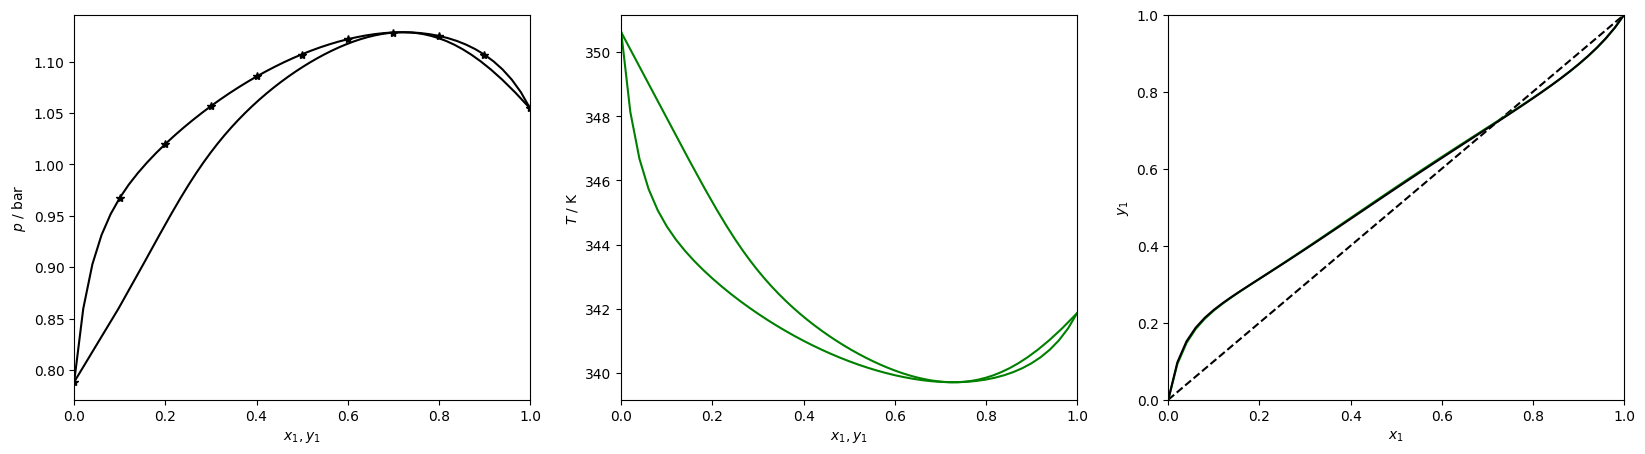

In [4]:

x = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6 , 0.7 , 0.8, 0.9, 1.0]

# Add binary parameters if there
parameters = PcSaftParameters.from_json(
    [comp1,comp2],
    'SI_pcp-saft_parameters.json',
    "binary_records_kij.json"
)
print("Binary parameter:")
print("k_ij = %f\n"%parameters.k_ij[0][1])

saft  = EquationOfState.pcsaft(parameters)
dia_p = PhaseDiagram.binary_vle(saft, T*KELVIN)
dia_t = PhaseDiagram.binary_vle(saft, P*BAR)

idxp  = np.in1d(np.round(dia_p.liquid.molefracs[:,0],2),x)

press = np.round([p/BAR for i,p in enumerate(dia_p.liquid.pressure) if i in np.arange(len(idxp))[idxp] ],3)
dens  = np.round([rho/(GRAM/METER**3)/1000 for i,rho in enumerate(dia_p.liquid.mass_density) if i in np.arange(len(idxp))[idxp] ],3)

act   = np.array([np.exp(st.liquid.ln_symmetric_activity_coefficient()) for i,st in enumerate(dia_p.states) if i in np.arange(len(idxp))[idxp] ])

print("Predicted equilibrium pressure:")
print(repr(press))
print("Predicted equilibrium mass density:")
print(repr(dens))
print("Predicted vapor composition:")
print(repr(dia_p.vapor.molefracs[:,0][idxp]))
print("Predicted activity coefficients")
print("comp1",repr(act[:,0]))
print("comp2",repr(act[:,1]))
print("\n")

idxt = np.in1d(np.round(dia_t.liquid.molefracs[:,0],2),x)
temp = np.round([t/KELVIN for i,t in enumerate(dia_t.liquid.temperature) if i in np.arange(len(idxt))[idxt] ],3)
dens = np.round([rho/(GRAM/METER**3)/1000 for i,rho in enumerate(dia_t.liquid.mass_density) if i in np.arange(len(idxt))[idxt] ],3)

print("Predicted equilibrium temperature:")
print(repr(temp))
print("Predicted equilibrium mass density:")
print(repr(dens))
print("Predicted vapor composition:")
print(repr(dia_t.vapor.molefracs[:,0][idxt]))
print("\n")

f, ax = plt.subplots(1,3,figsize=(20,5))
ax[0].plot(dia_p.liquid.molefracs[:,0], dia_p.liquid.pressure/BAR, '-k')
ax[0].plot(dia_p.vapor.molefracs[:,0], dia_p.vapor.pressure/BAR, '-k')
ax[0].plot(dia_p.liquid.molefracs[:,0][idxp],press,"*k")
ax[0].set_xlim(0,1)
ax[0].set_xlabel('$x_1,y_1$')
ax[0].set_ylabel('$p$ / bar')

ax[1].plot(dia_t.liquid.molefracs[:,0], dia_t.liquid.temperature/KELVIN, '-g')
ax[1].plot(dia_t.vapor.molefracs[:,0], dia_t.vapor.temperature/KELVIN, '-g')
ax[1].set_xlim(0,1)
ax[1].set_xlabel('$x_1,y_1$')
ax[1].set_ylabel('$T$ / K')

ax[2].plot([0,1], [0,1], '--k')
ax[2].plot(dia_t.liquid.molefracs[:,0], dia_t.vapor.molefracs[:,0], '-g')
ax[2].plot(dia_p.liquid.molefracs[:,0], dia_p.vapor.molefracs[:,0], '-k')
ax[2].set_xlim(0,1)
ax[2].set_ylim(0,1)
ax[2].set_xlabel('$x_1$')
ax[2].set_ylabel('$y_1$')

In [6]:

x_liq   = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6 , 0.7 , 0.8, 0.9, 1.0]

ref_dict     = work_json("reference_dict.json")

x_paper = np.array( ref_dict[mixture][dict_key]["post_processing"]["x_ref"] )
y_paper = np.array( ref_dict[mixture][dict_key]["post_processing"]["y_ref"] )
p_paper = np.array( ref_dict[mixture][dict_key]["post_processing"]["p_ref"] )

p_int = scipy.interpolate.interp1d(x_paper,p_paper,kind="quadratic")
p_equil  = p_int(x_liq)

try:
    y_int = scipy.interpolate.interp1d(x_paper,y_paper,kind="quadratic")
    y_equil  = y_int(x_liq)
    print("Interpolatet vapor molefraction range:")
    print(repr(y_equil),"\n")
except:
    pass

print("Interpolatet pressure range:")
print(repr(p_equil),"\n")



dens_liq = []

print("P-x diagramm:")
for x,pres in zip(x_liq,p_equil):

    state_npt = State(
        saft,
        temperature = T*KELVIN,
        pressure = pres*BAR,
        total_moles = 100.0*MOL,
        molefracs=np.array([x, 1-x]),
        density_initialization="liquid"
    )
    dens_liq.append(state_npt.mass_density())
    print("Check if system is stable: ",state_npt.is_stable())
    #print("Density: %s"%state_npt.mass_density())

print("\nMass density")
print(repr(np.round([rho/(GRAM/METER**3)/1000 for i,rho in enumerate(dens_liq) ],3)))

print("\nT-x diagramm")

x_liq   = dia_t.liquid.molefracs[:,0][idxt]
t_equil = temp

## Data from paper should be mapped onto 0 to 1 in 0.1 steps

# Data for Ethanol Water 
p_paper = 1.0
x_paper = [0.0, 0.015, 0.035, 0.1, 0.183, 0.292, 0.394, 0.501, 0.543, 0.631, 0.749, 0.794, 0.848, 0.899 ,0.949, 1.0]
t_paper = [373.15, 369.27, 365.61, 359.79, 356.66, 354.88, 353.89, 353.06, 352.73, 352.04, 351.67, 351.64 ,351.40, 351.33, 351.37, 351.45]
y_paper = [0.0, 0.139, 0.261, 0.436, 0.525, 0.585, 0.611, 0.648, 0.669, 0.714, 0.781, 0.814, 0.855, 0.898, 0.946, 1.0]

t_int = scipy.interpolate.interp1d(x_paper,t_paper,kind="quadratic")
y_int = scipy.interpolate.interp1d(x_paper,y_paper,kind="quadratic")

t_equil  = t_int(x_liq)
y_equil  = y_int(x_liq)

print("Interpolatet temperature range:")
print(t_equil,"\n")

print("Interpolatet vapor molefraction range:")
print(repr(y_equil),"\n")

dens_liq = []

for x,t in zip(x_liq,t_equil):

    state_nvt = State(
        saft,
        temperature = t*KELVIN,
        pressure = p_paper*BAR,
        total_moles = 100.0*MOL,
        molefracs=np.array([x, 1-x]),
        density_initialization="liquid"
    )
    dens_liq.append(state_nvt.mass_density())
    print("Check if system is stable: ",state_nvt.is_stable())
    #print("Density: %s"%state_nvt.mass_density())

print("\nMass density")
print(repr(np.round([rho/(GRAM/METER**3)/1000 for i,rho in enumerate(dens_liq) ],3)))

Interpolatet pressure range:
array([0.7969    , 0.90516471, 0.95757577, 1.02167609, 1.03331268,
       1.08285183, 1.08151736, 1.09730065, 1.09802372, 1.07318293,
       1.0527    ]) 

P-x diagramm:
Check if system is stable:  True
Check if system is stable:  False
Check if system is stable:  False
Check if system is stable:  False
Check if system is stable:  False
Check if system is stable:  False
Check if system is stable:  False
Check if system is stable:  False
Check if system is stable:  False
Check if system is stable:  False
Check if system is stable:  False

Mass density
array([700.034, 683.819, 671.848, 661.901, 652.945, 644.525, 636.439,
       628.679, 621.372, 614.861, 610.082])

T-x diagramm
Interpolatet temperature range:
[373.15       359.79       356.25599651 354.78829527 353.83974539
 353.06771292 352.2570666  351.7464628  351.62245489 351.33000053
 351.45      ] 

Interpolatet vapor molefraction range:
array([0.        , 0.436     , 0.53751859, 0.58778221, 0.61259703,

In [24]:
# Propanethiol - butane (https://doi.org/10.1021/je970028z)
x_paper = np.array( [ 0, 0.0064, 0.028, 0.0679, 0.1345, 0.2113, 0.3357, 0.422, 0.5244, 0.6274, 0.6811, 0.7112, 0.75, 0.8854, 0.9389, 0.9722, 1 ] )
# Vapor mole fraction #
y_paper = np.array( [ 0, 0.0653, 0.2336, 0.4235, 0.5916, 0.6953, 0.7882, 0.8294, 0.8668, 0.8979, 0.9127, 0.9208, 0.9311, 0.9671, 0.982, 0.9917, 1 ] )
# Equilibrium vapor pressure #
p_paper = np.array( [ 1.1, 1.173, 1.419, 1.836, 2.448, 3.096, 4.02, 4.594, 5.225, 5.798, 6.177, 6.289, 6.56901, 7.395, 7.73, 7.939, 8.105 ] )

# Propylamine - hexane (x1=propylamine: https://doi.org/10.1016/0378-3812(83)85029-8 )
x_paper = np.array([ 0, 0.0483, 0.0969, 0.1488, 0.1823, 0.2326, 0.2828, 0.3465, 0.3764,0.4283, 0.4819, 0.542, 0.583, 0.6591, 0.7083, 0.7668, 0.8044,0.8773, 0.9386, 0.9756, 1 ])
# Equilibrium vapor pressure #
p_paper = np.array([ 1.052, 1.1814, 1.2986, 1.4096, 1.4703, 1.556, 1.6345, 1.724, 1.7613, 1.8196, 1.8752, 1.932, 1.9654, 2.019, 2.056, 2.0894, 2.108, 2.136, 2.1526, 2.153, 2.157 ])
# Vapor mole fraction #
y_paper = np.array(x_paper)

#### Butylamine-hexane #### (https://doi.org/10.1016/0378-3812(95)02725-T)
# x_paper = np.array( [  0, 0.0509, 0.1199, 0.1729, 0.1969, 0.24, 0.3062, 0.3575, 0.3734, 0.459, 0.5509, 0.5838, 0.6604, 0.7112, 0.7469, 0.7953, 0.8374, 0.898, 0.9536, 1 ] )
# # Equilibrium vapor pressure #
# p_paper = np.array( [ 2.0153, 2.1097, 2.215, 2.282, 2.3115, 2.3583, 2.417, 2.455, 2.4634, 2.51, 2.5447, 2.551, 2.5636, 2.564, 2.564, 2.556, 2.5405, 2.5143, 2.482, 2.454 ] )
# # Vapor mole fraction #
# y_paper = np.array(x_paper)

array([  8.34197012,  10.34214   ,  13.78952   ,  20.68428   ,
        27.57904   ,  34.4738    ,  41.36856   ,  55.15808   ,
        68.9476    ,  82.73712   ,  86.1845    ,  96.52664   ,
       103.4214    , 110.31616   , 117.21092   , 120.6583    ,
       124.10568   , 124.795156  ])
array([0.        , 0.00899958, 0.02420755, 0.05730618, 0.08851129,
       0.12009424, 0.15132096, 0.21195639, 0.27392426, 0.33279512,
       0.34822225, 0.39780767, 0.4328788 , 0.46965633, 0.51036419,
       0.54254575, 0.56831284, 0.61648416])
array([0.        , 0.17221968, 0.35185743, 0.53185785, 0.62330905,
       0.67665453, 0.70980634, 0.74509141, 0.75737634, 0.7593656 ,
       0.75885109, 0.75283488, 0.74393653, 0.72853236, 0.70367216,
       0.68310024, 0.64400199, 0.61648416])
